# Machine Learning from disaster

## Titanic dataset from https://www.kaggle.com/c/titanic

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

# 03
from sklearn.linear_model import LogisticRegression
# 04
from sklearn.svm import SVC
# 05 
from sklearn.neural_network import MLPClassifier
# 06
from sklearn.ensemble import RandomForestClassifier
# 07
from sklearn.ensemble import GradientBoostingClassifier


import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


titanic = pd.read_csv('./titanic.csv')
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
# sum of null examples/features in data frame
print(titanic.isnull().sum());

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
##      PREPROCESSING START
##
# replace null/NA age with mean distribution
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
print(titanic.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex        Age  \
0                            Braund, Mr. Owen Harris    male  22.000000   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                             Heikkinen, Miss. Laina  female  26.000000   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                           Allen, Mr. William Henry    male  35.000000   
5                                   Moran, Mr. James    male  29.699118   
6                            McCarthy, Mr. Timothy J    male  54.000000   
7  

<Figure size 432x288 with 0 Axes>

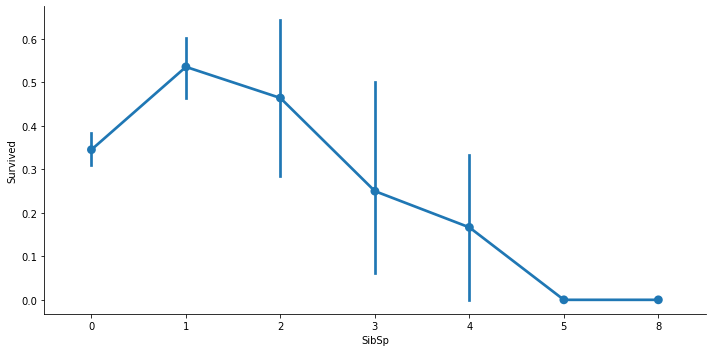

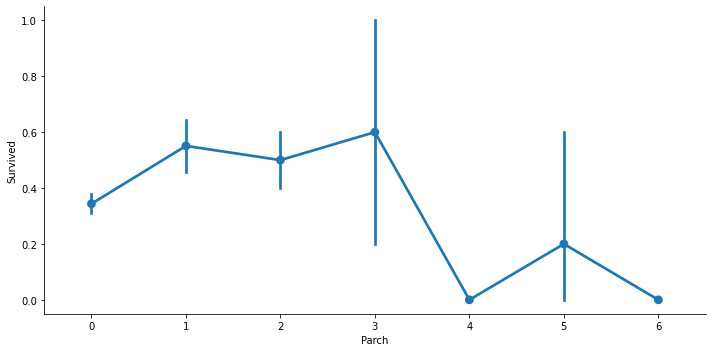

In [4]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [5]:
# combine siblings & spouses + parents & childen into single family_count param and drop originals it from cleaned data set
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)
print(titanic.head())

print(titanic.isnull().sum())

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age            Ticket     Fare Cabin Embarked  Family_cnt  
0    male  22.0         A/5 21171   7.2500   NaN        S           1  
1  female  38.0          PC 17599  71.2833   C85        C           1  
2  female  26.0  STON/O2. 3101282   7.9250   NaN        S           0  
3  female  35.0            113803  53.1000  C123        S           1  
4    male  35.0            373450   8.0500   NaN        S           0  
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Ticket          0
Fare           

In [6]:
# check how many survived in the cabin
print(titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean())

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64


In [7]:
# for the ones where Cabin is null, assign 0; else, assign 1
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
print(titanic.head())

   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age            Ticket     Fare Cabin Embarked  Family_cnt  \
0    male  22.0         A/5 21171   7.2500   NaN        S           1   
1  female  38.0          PC 17599  71.2833   C85        C           1   
2  female  26.0  STON/O2. 3101282   7.9250   NaN        S           0   
3  female  35.0            113803  53.1000  C123        S           1   
4    male  35.0            373450   8.0500   NaN        S           0   

   Cabin_ind  
0          0  
1          1  
2          0  
3          1  
4          0  


In [8]:
# map genders from string representation to 0 and 1 for male/female respectively
gender_num = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender_num)
print(titanic.head())

   Survived  Pclass                                               Name  Sex  \
0         0       3                            Braund, Mr. Owen Harris    0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       3                             Heikkinen, Miss. Laina    1   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       3                           Allen, Mr. William Henry    0   

    Age            Ticket     Fare Cabin Embarked  Family_cnt  Cabin_ind  
0  22.0         A/5 21171   7.2500   NaN        S           1          0  
1  38.0          PC 17599  71.2833   C85        C           1          1  
2  26.0  STON/O2. 3101282   7.9250   NaN        S           0          0  
3  35.0            113803  53.1000  C123        S           1          1  
4  35.0            373450   8.0500   NaN        S           0          0  


In [9]:
# drop unneeded features
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
print(titanic.head())

# save cleaned dataset so we don't have to clean it again
titanic.to_csv('./titanic_cleaned.csv', index=False)

# get y / labels of survived passengers
features = titanic.drop('Survived', axis=1)

# if you want to try with scaling features, uncomment next line
#features = preprocessing.scale(tr_features)
labels = titanic['Survived']

   Survived  Pclass  Sex   Age     Fare  Family_cnt  Cabin_ind
0         0       3    0  22.0   7.2500           1          0
1         1       1    1  38.0  71.2833           1          1
2         1       3    1  26.0   7.9250           0          0
3         1       1    1  35.0  53.1000           1          1
4         0       3    0  35.0   8.0500           0          0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=24) # random_state is random initialization seed
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=24)

# save features and labels to persisted storage so we don't need to process them again
X_train.to_csv('./train_features.csv', index=False)
X_val.to_csv('./val_features.csv', index=False)
X_test.to_csv('./test_features.csv', index=False)

y_train.to_csv('./train_labels.csv', index=False)
y_val.to_csv('./val_labels.csv', index=False)
y_test.to_csv('./test_labels.csv', index=False)

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


# read training features and labels from storage
tr_features = pd.read_csv('./train_features.csv')
tr_labels = pd.read_csv('./train_labels.csv')

# read test features and labels from storage
te_features = pd.read_csv('./test_features.csv')
te_labels = pd.read_csv('./test_labels.csv')

# read validation features and labels from storage
val_features = pd.read_csv('./val_features.csv')
val_labels = pd.read_csv('./val_labels.csv' )

In [11]:

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [12]:
lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel()) # reached max num of iterations w/o scaling features; import preprocessing from sklearn if needed

print_results(cv)

print(cv.best_estimator_);

joblib.dump(cv.best_estimator_, './LR_model.pkl')

BEST PARAMS: {'C': 1}

0.657 (+/-0.071) for {'C': 0.001}
0.687 (+/-0.065) for {'C': 0.01}
0.783 (+/-0.13) for {'C': 0.1}
0.79 (+/-0.114) for {'C': 1}
0.79 (+/-0.114) for {'C': 10}
0.79 (+/-0.114) for {'C': 100}
0.79 (+/-0.114) for {'C': 1000}
LogisticRegression(C=1)


['./LR_model.pkl']

In [13]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

joblib.dump(cv.best_estimator_, './SVM_model.pkl')

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.779 (+/-0.084) for {'C': 0.1, 'kernel': 'linear'}
0.665 (+/-0.059) for {'C': 0.1, 'kernel': 'rbf'}
0.779 (+/-0.084) for {'C': 1, 'kernel': 'linear'}
0.667 (+/-0.079) for {'C': 1, 'kernel': 'rbf'}
0.779 (+/-0.084) for {'C': 10, 'kernel': 'linear'}
0.67 (+/-0.077) for {'C': 10, 'kernel': 'rbf'}


['./SVM_model.pkl']

In [14]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)], # writing comma means default to 1 in desired dimension
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

print(cv.best_estimator_)

joblib.dump(cv.best_estimator_, './MLP_model.pkl')

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}

0.719 (+/-0.073) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.719 (+/-0.104) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.74 (+/-0.105) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.783 (+/-0.138) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.785 (+/-0.107) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.792 (+/-0.091) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.788 (+/-0.107) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.77 (+/-0.113) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.786 (+/-0.104) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning

['./MLP_model.pkl']

In [15]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

joblib.dump(cv.best_estimator_, './RF_model.pkl')

BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}

0.756 (+/-0.083) for {'max_depth': 2, 'n_estimators': 5}
0.777 (+/-0.096) for {'max_depth': 2, 'n_estimators': 50}
0.771 (+/-0.105) for {'max_depth': 2, 'n_estimators': 250}
0.788 (+/-0.08) for {'max_depth': 4, 'n_estimators': 5}
0.801 (+/-0.087) for {'max_depth': 4, 'n_estimators': 50}
0.792 (+/-0.073) for {'max_depth': 4, 'n_estimators': 250}
0.807 (+/-0.092) for {'max_depth': 8, 'n_estimators': 5}
0.807 (+/-0.095) for {'max_depth': 8, 'n_estimators': 50}
0.815 (+/-0.099) for {'max_depth': 8, 'n_estimators': 250}
0.79 (+/-0.073) for {'max_depth': 16, 'n_estimators': 5}
0.811 (+/-0.077) for {'max_depth': 16, 'n_estimators': 50}
0.803 (+/-0.091) for {'max_depth': 16, 'n_estimators': 250}
0.773 (+/-0.071) for {'max_depth': 32, 'n_estimators': 5}
0.803 (+/-0.078) for {'max_depth': 32, 'n_estimators': 50}
0.809 (+/-0.089) for {'max_depth': 32, 'n_estimators': 250}
0.792 (+/-0.078) for {'max_depth': None, 'n_estimators': 5}
0.798 (+/-0.08

['./RF_model.pkl']

In [16]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 2, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv);

joblib.dump(cv.best_estimator_, './GB_model.pkl')

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

0.607 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.777 (+/-0.088) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.783 (+/-0.092) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.803 (+/-0.109) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.607 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 5}
0.786 (+/-0.071) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}
0.805 (+/-0.067) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 250}
0.805 (+/-0.07) for {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
0.607 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.794 (+/-0.063) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.813 (+/-0.075) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.807 (+/-0.083) for {'learning_ra

['./GB_model.pkl']

In [17]:
models = {}

for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('./{}_model.pkl'.format(mdl)) # load saved models from storage e.g. './LR_model.pkl'


# prediction evaluation metric btwn accuracy, precision, recall
def evaluate_model(name, model, features, labels):
    start = time()
    
    # predict
    predictions = model.predict(features)
    
    end = time()
    accuracy = round(accuracy_score(labels, predictions), 3)
    precision = round(precision_score(labels, predictions), 3)
    recall = round(recall_score(labels, predictions), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

# evaluate performance of all the best models on cross validation set
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

# evaluate on test features
evaluate_model('Gradient Boost', models['GB'], te_features, te_labels)
evaluate_model('Random Forest', models['RF'], te_features, te_labels)

LR -- Accuracy: 0.826 / Precision: 0.806 / Recall: 0.773 / Latency: 1.0ms
SVM -- Accuracy: 0.82 / Precision: 0.803 / Recall: 0.76 / Latency: 2.0ms
MLP -- Accuracy: 0.803 / Precision: 0.756 / Recall: 0.787 / Latency: 1.0ms
RF -- Accuracy: 0.831 / Precision: 0.846 / Recall: 0.733 / Latency: 20.0ms
GB -- Accuracy: 0.831 / Precision: 0.817 / Recall: 0.773 / Latency: 2.0ms
Gradient Boost -- Accuracy: 0.821 / Precision: 0.712 / Recall: 0.737 / Latency: 2.0ms
Random Forest -- Accuracy: 0.849 / Precision: 0.788 / Recall: 0.719 / Latency: 19.0ms
